In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

In [2]:
terrdf = pd.read_excel("gtd_cleaned_data.xlsx")
terrdf.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,apprx_start_date,apprx_end_date,idate
0,0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,...,Unknown,-99,0,0,0,0,NaN,NaT,NaT,1970-07-02
1,1,197000000002,1970,1,1,NaN,0,NaT,130,Mexico,...,Unknown,-99,0,1,1,1,NaN,NaT,NaT,1970-01-01
2,2,197001000001,1970,1,1,NaN,0,NaT,160,Philippines,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
3,3,197001000002,1970,1,1,NaN,0,NaT,78,Greece,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
4,4,197001000003,1970,1,1,NaN,0,NaT,101,Japan,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01


In [3]:
features = ['imonth','iday','extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill', 'success']

In [4]:
terrdf[features].isna().sum()

imonth            0
iday              0
extended          0
latitude       4691
longitude      4692
multiple          0
suicide           0
attacktype1       0
targtype1         0
individual        0
weaptype1         0
nkill             0
success           0
dtype: int64

In [5]:
data = terrdf[features].dropna()
data.isna().sum()

imonth         0
iday           0
extended       0
latitude       0
longitude      0
multiple       0
suicide        0
attacktype1    0
targtype1      0
individual     0
weaptype1      0
nkill          0
success        0
dtype: int64

In [6]:
y = data['success']
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [7]:
def plot_confusion_matrix(cm,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy = {:.2f}'.format(logreg.score(X_test, y_test)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4848
        True       1.00      1.00      1.00     36155

    accuracy                           1.00     41003
   macro avg       1.00      1.00      1.00     41003
weighted avg       1.00      1.00      1.00     41003

Accuracy = 1.00


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


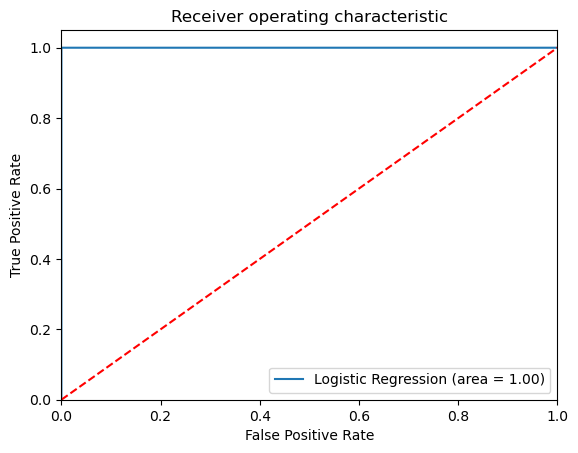

In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [10]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=5)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

10-fold cross validation average accuracy: 1.000


C:\Users\kunal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


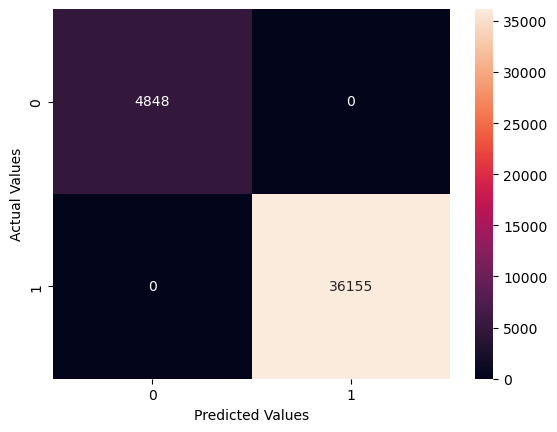

In [11]:
import seaborn as sns
cnfe = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cnfe, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show() 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy = ",accuracy_score(y_pred,y_test))

Accuracy =  0.897227032168378


In [13]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.72      0.21      0.33      4848
        True       0.90      0.99      0.94     36155

    accuracy                           0.90     41003
   macro avg       0.81      0.60      0.64     41003
weighted avg       0.88      0.90      0.87     41003



In [14]:
cnf = confusion_matrix(y_test,y_pred)

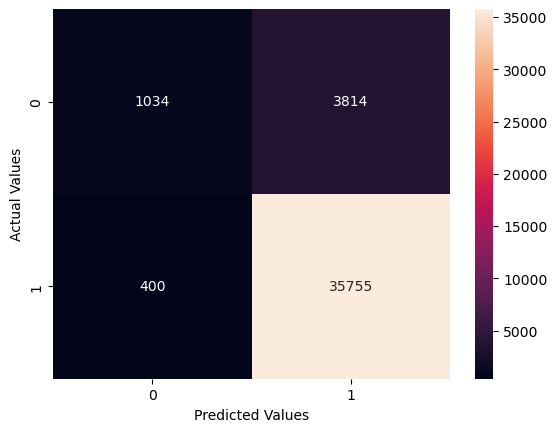

In [15]:
plt.figure()
sns.heatmap(cnf, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show() 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

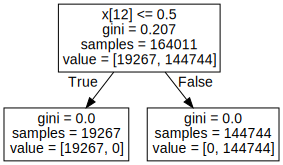

In [17]:
import graphviz 
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data")
graph

In [18]:
from sklearn.metrics import accuracy_score
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))
print("Accuracy = ",accuracy_score(dtc_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4848
        True       1.00      1.00      1.00     36155

    accuracy                           1.00     41003
   macro avg       1.00      1.00      1.00     41003
weighted avg       1.00      1.00      1.00     41003

Accuracy =  1.0


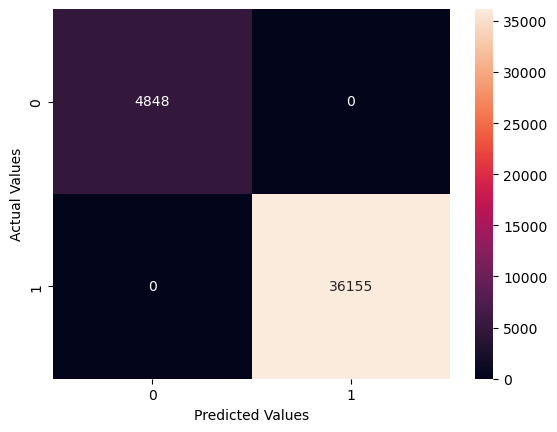

In [19]:
cnf1 = confusion_matrix(y_test,dtc_pred)
plt.figure()
sns.heatmap(cnf1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show() 

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))
print("accuracy = ",accuracy_score(rfc_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4848
        True       1.00      1.00      1.00     36155

    accuracy                           1.00     41003
   macro avg       1.00      1.00      1.00     41003
weighted avg       1.00      1.00      1.00     41003

accuracy =  1.0


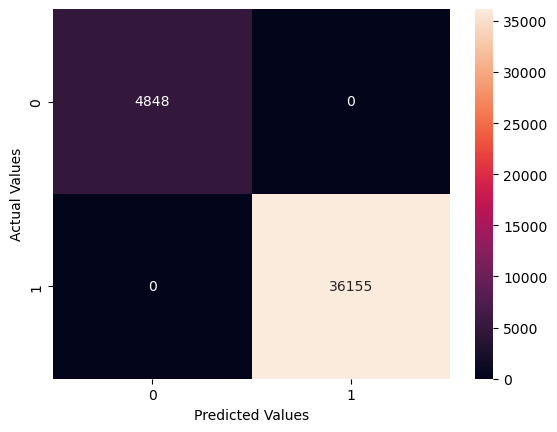

In [21]:
cnf2=confusion_matrix(y_test,rfc_pred)
plt.figure()
sns.heatmap(cnf2, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show() 

In [22]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.0010892015419550866
iday 0.0013708932132964233
extended 0.0019165320391023824
latitude 0.005729126796047736
longitude 0.005579117279766626
multiple 0.0007672646395153751
suicide 0.0016234493072642756
attacktype1 0.027651391601539482
targtype1 0.030216638301205044
individual 6.299672269641064e-05
weaptype1 0.0031073682505302564
nkill 0.03106952703949753
success 0.8898164932675834


In [23]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
dat = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.00171,0.00013,0.00210,0.00052,0.00400,0.03291,0.02591,0.02656,0.00096,0.00122,0.00528,0.00589],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

dat = [dat]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=dat, layout=layout)
plot(fig)

'temp-plot.html'

In [24]:
features1=['weaptype1', 'nkill', 'attacktype1','targtype1', 'multiple', 'suicide',
       'imonth',  'iday', 'latitude',  'longitude','extended']
y1 = data['success']
X1 = data[features1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=30)

In [25]:
rfc1 = RandomForestClassifier(n_estimators=400) 
rfc1 = rfc1.fit(X1_train, y1_train)
rfc_pred1 = rfc1.predict(X1_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test,rfc_pred1))
print("accuracy = ",accuracy_score(rfc_pred1,y1_test))

              precision    recall  f1-score   support

       False       0.80      0.49      0.61      4848
        True       0.93      0.98      0.96     36155

    accuracy                           0.93     41003
   macro avg       0.87      0.74      0.78     41003
weighted avg       0.92      0.93      0.92     41003

accuracy =  0.9252249835377899


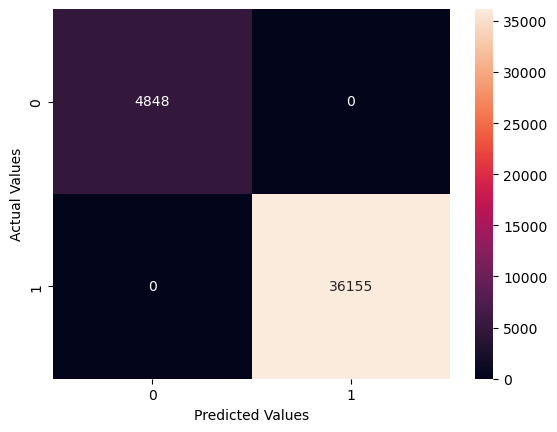

In [26]:
cnf3=confusion_matrix(y_test,rfc_pred)
plt.figure()
sns.heatmap(cnf3, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show() 